# ***50_Startups Profit Prediction Project***

In [ ]:
#!pip install ydata-profiling


### **Data Loading & Overview**

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

df=pd.read_csv("/content/50_Startups.csv")
profile = ProfileReport(df, title="50_Startups Profiling Report")
profile.to_file("50_Startups.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 83.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


###**Exploratory Data Analysis (EDA)**

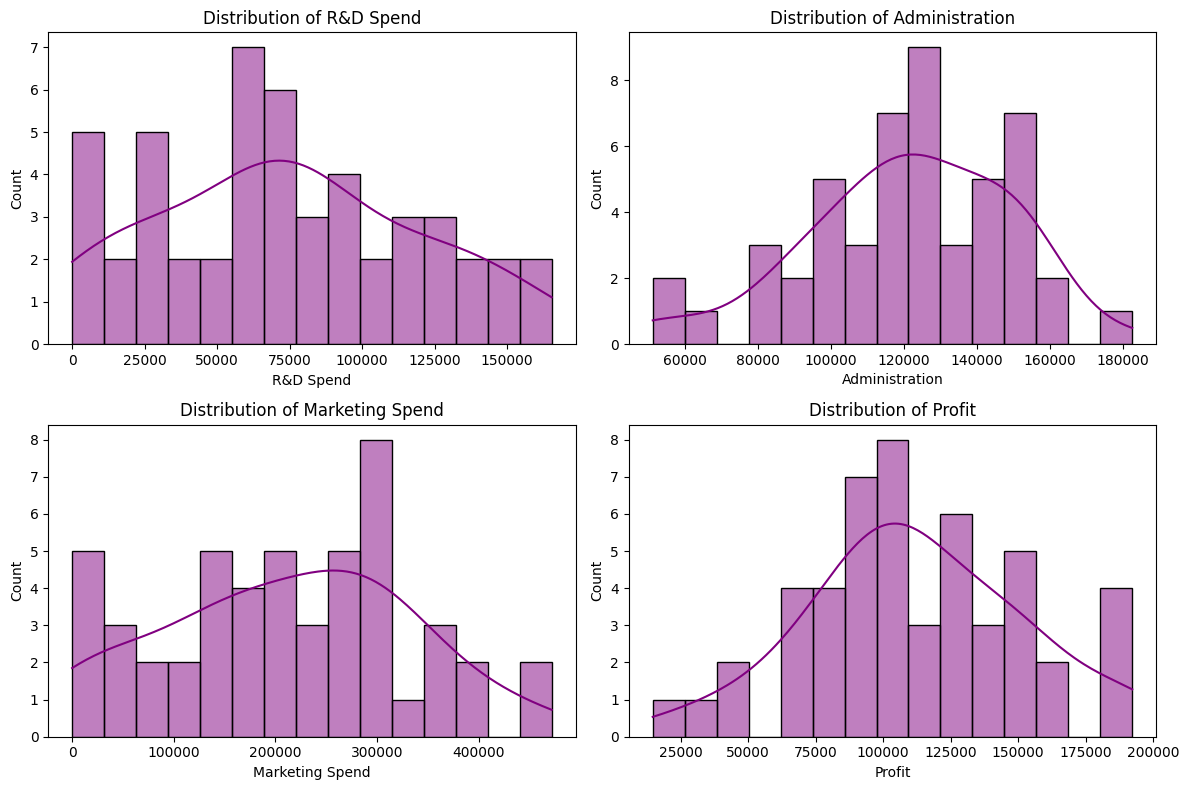

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
n_cols = 2
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, bins=15, x=col, kde=True, ax=axes[i], color='purple')
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###**Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.15, random_state=42)

In [ ]:
display(train_set.describe(), test_set.describe())

,R&D Spend,Administration,Marketing Spend,Profit
count,42.000000,42.000000,42.000000,42.000000
mean,77555.770952,122105.967381,225618.297381,115387.464762
std,46787.548245,27260.966336,121152.454545,41094.258618
min,0.000000,51283.140000,0.000000,14681.400000
25%,44555.967500,103730.875000,142431.385000,92151.020000
50%,75124.210000,122107.195000,239452.750000,109543.120000
75%,118588.332500,146781.667500,304406.362500,145656.312500
max,165349.200000,182645.560000,471784.100000,192261.830000


,R&D Spend,Administration,Marketing Spend,Profit
count,8.000000,8.000000,8.000000,8.000000
mean,53592.300000,117347.668750,134410.800000,94294.805000
std,37096.077382,33473.111459,103574.742446,32462.789166
min,542.050000,51743.150000,0.000000,35673.410000
25%,29168.940000,107476.482500,68824.412500,76985.840000
50%,63329.595000,129824.055000,136006.345000,102835.565000
75%,79494.750000,140698.865000,194415.707500,111895.847500
max,94657.160000,145077.580000,282574.310000,134307.350000


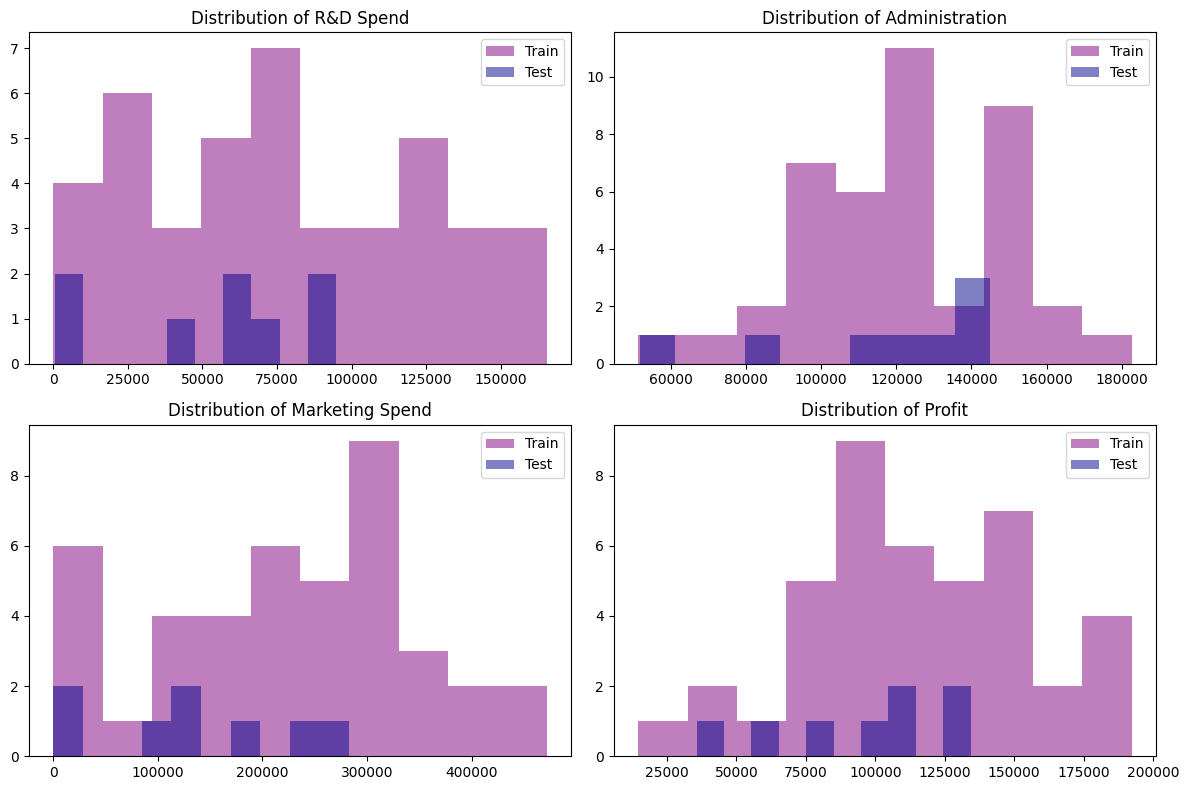

In [ ]:
import matplotlib.pyplot as plt

cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

# Calculate the number of rows needed (2 plots per row)
n_rows = (len(cols) + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(cols):
    axes[i].hist(train_set[col], alpha=0.5, label='Train', bins=10, color='purple')
    axes[i].hist(test_set[col], alpha=0.5, label='Test', bins=10, color='darkblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

# Remove any unused subplots if the number of columns is odd
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation of all numerical features with 'Profit'
profit_correlations = df.corr(numeric_only=True)['Profit'].sort_values(ascending=False)

# Display with a background gradient
display(profit_correlations.to_frame().style.background_gradient(cmap='coolwarm'))

,Profit
Profit,1.000000
R&D Spend,0.972900
Marketing Spend,0.747766
Administration,0.200717


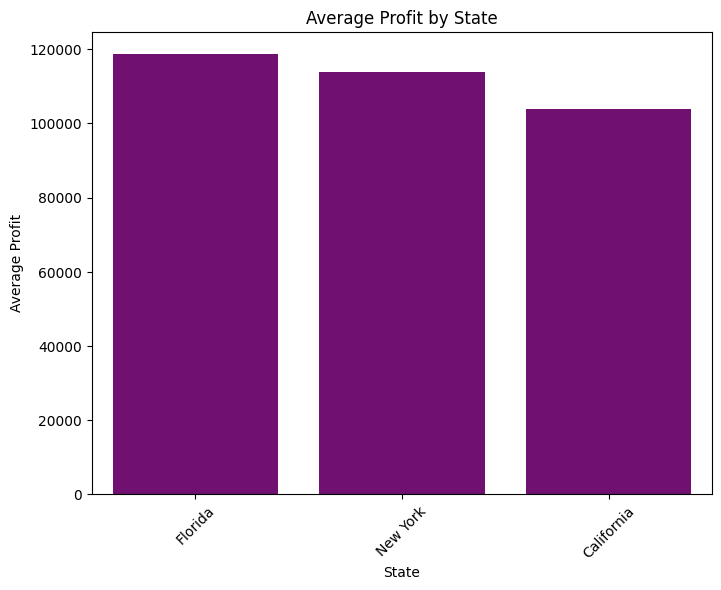

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'State' and calculate the mean profit
state_profit_mean = df.groupby('State')['Profit'].mean().reset_index().sort_values(by='Profit', ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='Profit', data=state_profit_mean, color='purple')
plt.xticks(rotation=45)
plt.title("Average Profit by State")
plt.xlabel("State")
plt.ylabel("Average Profit")
plt.show()

In [ ]:
train_features = train_set.drop("Profit", axis=1)
train_labels = train_set["Profit"].copy()

In [ ]:
startups_cat = train_features[["State"]]
startups_cat.head(10)

,State
32,California
19,New York
12,Florida
4,Florida
37,California
8,New York
3,New York
6,California
41,Florida
46,Florida


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(train_set[['State']])
encoded.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
encoder.categories_

[array(['California', 'Florida', 'New York'], dtype=object)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

startups_num=train_features.drop('State',axis=1)
train_features_scaled = scaler.fit_transform(startups_num)
train_features_scaled.min(axis=0), train_features_scaled.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

###**Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_features_scaled, train_labels)

lin_reg.predict(train_features_scaled)

array([ 99025.4358276 , 115106.62079204, 128954.52884502, 173591.02215777,
        92048.9091565 , 150824.22321213, 174032.98608479, 158002.7692936 ,
        75810.47084092,  55201.99094327,  45665.14447921, 146445.09051009,
       155618.2408928 , 116727.65856083, 114444.16466392,  87208.18457591,
        96615.64194481, 192098.4425416 ,  63184.87977557, 113620.70431734,
        98358.17640731, 164586.15934956, 100702.6231287 , 136888.02971217,
        74498.42667206, 188211.82283425, 115741.05409302, 183211.60593205,
        59733.21069905,  91590.23402636, 110190.07829042,  74458.05678244,
       136152.75280118, 114301.75078687, 129188.03191338,  47983.00857997,
       116631.3801071 , 159307.39720025,  71172.23424618, 148485.51003965,
        99356.90670595,  71297.96027636])

###**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score

r2_score(train_labels, lin_reg.predict(train_features_scaled))

0.9527698171659738

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, train_features_scaled, train_labels,
                         scoring="r2", cv=5)
scores

array([0.95772995, 0.96157142, 0.95822409, 0.95820015, 0.87047261])

In [ ]:
# Testing Accuracy

test_features = test_set.drop("Profit", axis=1)
test_labels = test_set["Profit"].copy()

# Drop the 'State' column before scaling
test_features_for_scaling = test_features.drop('State', axis=1)


test_labels = test_set["Profit"].copy()

test_features_scaled = scaler.transform(test_features_for_scaling)
r2_score(test_labels, lin_reg.predict(test_features_scaled))

0.9046696001410927